# Importação de bibliotecas

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,10)
plt.style.use("seaborn-whitegrid")
np.set_printoptions(precision=5,suppress=True)


# Importação e visualização dos dados

In [2]:
dataset = pd.read_csv('polynomial_regression_data.csv',header=None).rename(columns={0:'x',1:'y'})
dataset

,x,y
0,0.696469,-0.851271
1,0.286139,0.910864
2,0.226851,0.939731
3,0.551315,-0.323798
4,0.719469,-0.872451
5,0.423106,0.417776
6,0.980764,-0.153078
7,0.684830,-0.949134
8,0.480932,0.281049
9,0.392118,0.787241


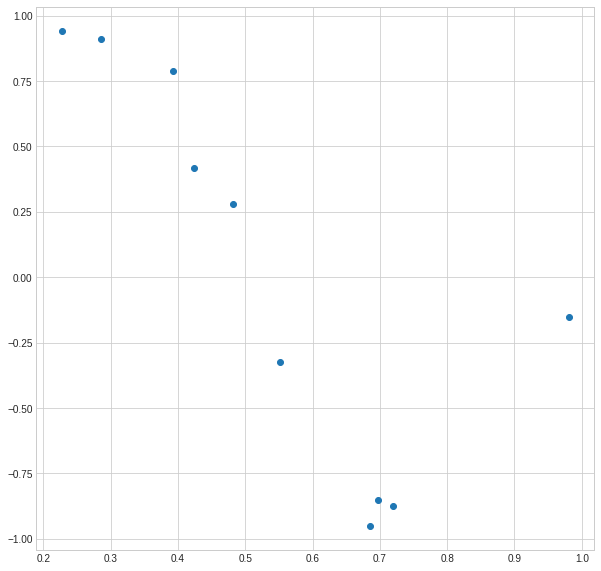

In [25]:
# plt.figure(figsize=(10,8))
plt.scatter(dataset['x'],dataset['y'])
plt.show()

# Pré-processamento dos dados

In [5]:
x = dataset['x'].values.reshape(-1,1)
y = dataset['y'].values.reshape(-1,1)
p = 6
x

array([[0.69647],
       [0.28614],
       [0.22685],
       [0.55131],
       [0.71947],
       [0.42311],
       [0.98076],
       [0.68483],
       [0.48093],
       [0.39212]])

In [6]:
X = np.ones(dataset.shape[0]).reshape(-1,1)
for i in range (1,p):
    arr = x ** i
    X = np.hstack([X,arr.reshape(-1,1)])
    
X

array([[1.     , 0.69647, 0.48507, 0.33784, 0.23529, 0.16387],
       [1.     , 0.28614, 0.08188, 0.02343, 0.0067 , 0.00192],
       [1.     , 0.22685, 0.05146, 0.01167, 0.00265, 0.0006 ],
       [1.     , 0.55131, 0.30395, 0.16757, 0.09238, 0.05093],
       [1.     , 0.71947, 0.51764, 0.37242, 0.26795, 0.19278],
       [1.     , 0.42311, 0.17902, 0.07574, 0.03205, 0.01356],
       [1.     , 0.98076, 0.9619 , 0.9434 , 0.92525, 0.90745],
       [1.     , 0.68483, 0.46899, 0.32118, 0.21995, 0.15063],
       [1.     , 0.48093, 0.2313 , 0.11124, 0.0535 , 0.02573],
       [1.     , 0.39212, 0.15376, 0.06029, 0.02364, 0.00927]])

# Passo de estimação

## Definições a partir de conhecimentos/experimentos anteriores 

Os momentos da priori $p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mathbf{m_0},\mathbf{S_0})$. 




$\xrightarrow{}$ Definirei $\mathbf{m_0} = [0 \ 0 \ 0 \ 0 \ 0 \ 0]$ e $\mathbf{S_0} = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 1\\
\end{bmatrix} $

A variância do ruı́do $ p(\epsilon) = \mathcal{N}(\epsilon | 0,\sigma^2) $

$\xrightarrow{}$ Usarei $\sigma^2 = \{ 1 \ , 5e-2\ ,1e-2 \ ,1e-4 \ ,1e-6 \ ,1e-8 \}$ 

In [7]:
m0 = np.zeros(p).reshape(-1,1)
S0 = np.eye((p))
sigma_ruidos = [1,5E-2,1E-2,1E-4,1E-6,1E-8]

## Cálculo da posteriori de w e da distribuição preditiva

Posteriori de w

$\xrightarrow{} p(\mathbf{w} | \mathcal{D}) = \mathcal{N}(\mathbf{w} | \mathbf{\mu},\mathbf{\Sigma})$

 


$\mathbf{\mu} = \mathbf{m_0} + (\mathbf{S_0}\mathbf{X}^{T}\mathbf{X} + \sigma^2 \mathbf{I})^{-1} \ \mathbf{S_0}\mathbf{X}^{T}(\mathbf{y}-\mathbf{X}\mathbf{m_0})$ ,

$ \mathbf{\Sigma} = \mathbf{S_0} - (\mathbf{S_0}\mathbf{X}^{T}\mathbf{X} + \sigma^2 \mathbf{I})^{-1} \ \mathbf{S_0}\mathbf{X}^{T}\mathbf{X}\mathbf{S_0} $

Distribuição preditiva

$\xrightarrow{} p(\mathbf{y_*} | \mathbf{X_*}) = \mathcal{N}(\mathbf{y_*} | \mathbf{X_*}\mathbf{\mu} \ , \ \mathbf{X_*}\mathbf{\Sigma}\mathbf{X_*}^{T} + \sigma^2\mathbf{I})$

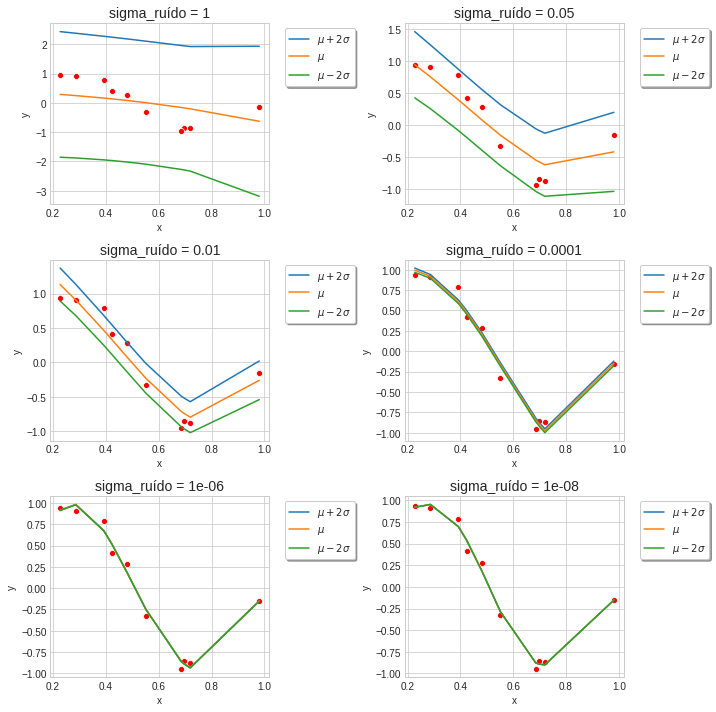

In [26]:
f, axes = plt.subplots(3, 2)
for i in range(3):
    for j in range(2):
        sigma_ruido = sigma_ruidos[i*2+j] 
        
        u_1 = np.linalg.inv(S0.dot(X.T).dot(X) + np.eye(p)*sigma_ruido) 
        u_2 = S0.dot(X.T).dot(y - X.dot(m0))
        u = m0 + u_1.dot(u_2)

        sigma_1 = u_1 
        sigma_2 = S0.dot(X.T).dot(X).dot(S0)
        sigma = S0 - (sigma_1.dot(sigma_2))

        u_final = X.dot(u).flatten()
        sigma_final = np.diag(X.dot(sigma).dot(X.T) + np.eye(10)*sigma_ruido )

        banda = 2 * np.sqrt(sigma_final).reshape(-1,1).flatten()
        banda_mais = u_final + banda
        banda_menos = u_final - banda
        
        axes[i,j].set_title(f"sigma_ruído = {sigma_ruido}", fontsize=14)
        sns.scatterplot(dataset['x'],dataset['y'],ax=axes[i,j],color='r')
        sns.lineplot(dataset['x'],banda_mais,ax=axes[i,j],label='$\mu+2 \sigma$')
        sns.lineplot(dataset['x'],u_final,ax=axes[i,j],label='$\mu$')
        sns.lineplot(dataset['x'],banda_menos,ax=axes[i,j],label='$\mu-2 \sigma$')
        axes[i,j].legend(bbox_to_anchor=(1.05, 1), loc=2,shadow=True,frameon=True)
        
plt.tight_layout()